In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
df=pd.read_excel('C:/Users/AmritaBhattacharya/OneDrive - Zeta Global/Desktop/Affinity2.xlsx')

In [3]:
df.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEG_100001,SEG_100002,SEG_100606,SEG_100433,SEG_100430,...,SEG_100697,SEG_100710,SEG_100712,SEG_100709,SEG_100704,SEG_100713,SEG_100711,SEG_100714,SEG_100715,MODIFIED_TS
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1 = df.replace(r'^\s*$', np.NaN, regex=True)
df1.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEG_100001,SEG_100002,SEG_100606,SEG_100433,SEG_100430,...,SEG_100697,SEG_100710,SEG_100712,SEG_100709,SEG_100704,SEG_100713,SEG_100711,SEG_100714,SEG_100715,MODIFIED_TS
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2=df1.melt(id_vars=["EMAIL_MD5","AGE", "GENDER", "INCOME", "DMA"], var_name="SEGMENT ID", value_name="Scores")
df2.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEGMENT ID,Scores
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,SEG_100001,NaN
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,SEG_100001,NaN
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,SEG_100001,NaN
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,SEG_100001,NaN
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,SEG_100001,NaN


In [6]:
df2.rename(columns = {'SEGMENT ID':'SEGMENT_ID'}, inplace = True)
df2.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEGMENT_ID,Scores
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,SEG_100001,NaN
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,SEG_100001,NaN
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,SEG_100001,NaN
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,SEG_100001,NaN
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,SEG_100001,NaN


In [7]:
data_dict=pd.read_excel('C:/Users/AmritaBhattacharya/OneDrive - Zeta Global/Desktop/Affinity_dict.xlsx')
data_dict.head()

,SEGMENT ID,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
0,SEG_100001,Apparel & Accessories,Accessories,Coach
1,SEG_100002,Apparel & Accessories,Accessories,Guess
2,SEG_100048,Apparel & Accessories,Apparel Stores,Abercrombie & Fitch
3,SEG_100038,Apparel & Accessories,Apparel Stores,American Eagle
4,SEG_100058,Apparel & Accessories,Apparel Stores,Banana Republic


In [8]:
data_dict.rename(columns = {'SEGMENT ID':'SEGMENT_ID'}, inplace = True)
data_dict.head()

,SEGMENT_ID,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
0,SEG_100001,Apparel & Accessories,Accessories,Coach
1,SEG_100002,Apparel & Accessories,Accessories,Guess
2,SEG_100048,Apparel & Accessories,Apparel Stores,Abercrombie & Fitch
3,SEG_100038,Apparel & Accessories,Apparel Stores,American Eagle
4,SEG_100058,Apparel & Accessories,Apparel Stores,Banana Republic


In [9]:
df2.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEGMENT_ID,Scores
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,SEG_100001,NaN
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,SEG_100001,NaN
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,SEG_100001,NaN
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,SEG_100001,NaN
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,SEG_100001,NaN


In [10]:
new_data=df2.join(data_dict.set_index('SEGMENT_ID'), on='SEGMENT_ID')
new_data.head()

,EMAIL_MD5,AGE,GENDER,INCOME,DMA,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
0,0000e3b866301159fec58c6d2c50ff68,NaN,M,48000.0,New York NY,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
1,00010f73d2902ebd3dcf25266a921551,48.0,F,NaN,NaN,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
2,0001c3cf1a4930fb08fe7e0881c07e3e,46.0,F,429000.0,New York NY,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
3,00029c9144de248bda40f969ab7fa576,NaN,NaN,NaN,NaN,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
4,0003a0c905524d4776536f2b08612492,NaN,NaN,NaN,NaN,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach


In [11]:
new_data.isna().sum()

EMAIL_MD5                           0
AGE                          15903108
GENDER                       13842252
INCOME                       20510424
DMA                          20905224
SEGMENT_ID                          0
Scores                       36447000
CATEGORY_SEGMENT_NAME         1090392
SUB_CATEGORY_SEGMENT_NAME     2271650
BRAND_SEGMENT_NAME            1090392
dtype: int64

In [ ]:
# finding missing values by each group and each Segment ID

In [36]:
finders= new_data.drop (columns=["EMAIL_MD5","AGE", "GENDER", "INCOME", "DMA", "SUB_CATEGORY_SEGMENT_NAME","BRAND_SEGMENT_NAME"])
finders.head()

,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME
0,SEG_100001,NaN,Apparel & Accessories
1,SEG_100001,NaN,Apparel & Accessories
2,SEG_100001,NaN,Apparel & Accessories
3,SEG_100001,NaN,Apparel & Accessories
4,SEG_100001,NaN,Apparel & Accessories


In [63]:
finders.SEGMENT_ID.nunique()

564

In [53]:
finders.groupby(['CATEGORY_SEGMENT_NAME','SEGMENT_ID']).Scores.apply(lambda x: x.isnull().sum())

CATEGORY_SEGMENT_NAME  SEGMENT_ID
Apparel & Accessories  SEG_100001    64482
                       SEG_100002    64482
                       SEG_100004    64482
                       SEG_100005    64482
                       SEG_100006    64482
                                     ...  
Travel                 SEG_100606    64482
                       SEG_100607    64482
                       SEG_100608    64482
                       SEG_100613    64482
                       SEG_100629    64482
Name: Scores, Length: 552, dtype: int64

In [57]:
finders[finders.CATEGORY_SEGMENT_NAME=="Online Shoppers"].groupby(['SEGMENT_ID']).Scores.apply(lambda x: len(x))

SEGMENT_ID
SEG_100617    90866
Name: Scores, dtype: int64

In [60]:
finders[finders.CATEGORY_SEGMENT_NAME=="Online Shoppers"].groupby(['SEGMENT_ID']).Scores.apply(lambda x: x.isna().sum())

SEGMENT_ID
SEG_100617    64482
Name: Scores, dtype: int64

In [61]:
finders[finders.CATEGORY_SEGMENT_NAME=="Mass Retailers"].groupby(['SEGMENT_ID']).Scores.apply(lambda x: len(x))

SEGMENT_ID
SEG_100174    90866
SEG_100175    90866
SEG_100176    90866
SEG_100177    90866
SEG_100178    90866
SEG_100179    90866
SEG_100180    90866
SEG_100181    90866
SEG_100183    90866
SEG_100186    90866
SEG_100187    90866
SEG_100448    90866
SEG_100470    90866
SEG_100471    90866
SEG_100580    90866
Name: Scores, dtype: int64

In [62]:
finders[finders.CATEGORY_SEGMENT_NAME=="Mass Retailers"].groupby(['SEGMENT_ID']).Scores.apply(lambda x: x.isna().sum())

SEGMENT_ID
SEG_100174    64482
SEG_100175    64482
SEG_100176    64482
SEG_100177    64482
SEG_100178    64482
SEG_100179    64482
SEG_100180    64482
SEG_100181    64482
SEG_100183    64482
SEG_100186    64482
SEG_100187    64482
SEG_100448    64482
SEG_100470    64482
SEG_100471    64482
SEG_100580    64482
Name: Scores, dtype: int64

In [91]:
#missing values by percentages for each group and each Segment ID.

finders.groupby(['CATEGORY_SEGMENT_NAME','SEGMENT_ID']).Scores.apply(lambda x: x.isnull().sum()/len(x))

CATEGORY_SEGMENT_NAME  SEGMENT_ID
Apparel & Accessories  SEG_100001    0.709638
                       SEG_100002    0.709638
                       SEG_100004    0.709638
                       SEG_100005    0.709638
                       SEG_100006    0.709638
                                       ...   
Travel                 SEG_100606    0.709638
                       SEG_100607    0.709638
                       SEG_100608    0.709638
                       SEG_100613    0.709638
                       SEG_100629    0.709638
Name: Scores, Length: 552, dtype: float64

In [ ]:
# finding missing values by each group only

In [93]:
finders.groupby(['CATEGORY_SEGMENT_NAME'])['Scores'].apply(lambda x: x.isna().sum())

CATEGORY_SEGMENT_NAME
Apparel & Accessories          6925958
Automotive                     1869978
Consumer Services              3159618
Entertainment                  2192388
Food & Pharmacy                6383718
Home                           2412218
Mass Retailers                  967230
Office, Electronics, Games     1225158
Online Shoppers                  64482
Restaurant                     4836150
Specialty Retail               1998942
Subscription Shoppers            64482
Travel                         3546510
Name: Scores, dtype: int64

In [58]:
total_bygroup=finders.groupby(['CATEGORY_SEGMENT_NAME'])['Scores'].apply(lambda x: len(x))
total_bygroup.head(20)

CATEGORY_SEGMENT_NAME
Apparel & Accessories          9722662
Automotive                     2635114
Consumer Services              4452434
Entertainment                  3089444
Food & Pharmacy                8995734
Home                           3362042
Mass Retailers                 1362990
Office, Electronics, Games     1726454
Online Shoppers                  90866
Restaurant                     6814950
Specialty Retail               2816846
Subscription Shoppers            90866
Travel                         4997630
Name: Scores, dtype: int64

In [94]:
#missing values by percentages for each group only. 
#Each category has similar percentages of missing values. 

finders.groupby(['CATEGORY_SEGMENT_NAME'])['Scores'].apply(lambda x: x.isna().sum()/len(x))

CATEGORY_SEGMENT_NAME
Apparel & Accessories          0.712352
Automotive                     0.709638
Consumer Services              0.709638
Entertainment                  0.709638
Food & Pharmacy                0.709638
Home                           0.717486
Mass Retailers                 0.709638
Office, Electronics, Games     0.709638
Online Shoppers                0.709638
Restaurant                     0.709638
Specialty Retail               0.709638
Subscription Shoppers          0.709638
Travel                         0.709638
Name: Scores, dtype: float64

In [88]:
# Going back to new_data to continue analysis.

new_data.shape

(51248424, 10)

In [66]:
df5= new_data.drop (columns=["EMAIL_MD5","AGE", "GENDER", "INCOME", "DMA"])
df5.head()

,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
0,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
1,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
2,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
3,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach
4,SEG_100001,NaN,Apparel & Accessories,Accessories,Coach


In [67]:
df5.shape

(51248424, 5)

In [68]:
df5.isna().sum()

SEGMENT_ID                          0
Scores                       36447000
CATEGORY_SEGMENT_NAME         1090392
SUB_CATEGORY_SEGMENT_NAME     2271650
BRAND_SEGMENT_NAME            1090392
dtype: int64

In [69]:
nomissing_data=df5.dropna()
nomissing_data.head()

,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
7,SEG_100001,40.0,Apparel & Accessories,Accessories,Coach
14,SEG_100001,10.0,Apparel & Accessories,Accessories,Coach
15,SEG_100001,22.0,Apparel & Accessories,Accessories,Coach
16,SEG_100001,9.0,Apparel & Accessories,Accessories,Coach
19,SEG_100001,46.0,Apparel & Accessories,Accessories,Coach


In [ ]:
# Rest of our analysis is based on nomissing_data

In [70]:
nomissing_data.shape

(14168208, 5)

In [71]:
nomissing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14168208 entries, 7 to 50248897
Data columns (total 5 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   SEGMENT_ID                 object
 1   Scores                     object
 2   CATEGORY_SEGMENT_NAME      object
 3   SUB_CATEGORY_SEGMENT_NAME  object
 4   BRAND_SEGMENT_NAME         object
dtypes: object(5)
memory usage: 648.6+ MB


In [72]:
# Change datatype of Scores from object to float

nomissing_data.Scores = nomissing_data["Scores"].astype(str).astype(float)
nomissing_data.head()

C:\Users\AmritaBhattacharya\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
7,SEG_100001,40.0,Apparel & Accessories,Accessories,Coach
14,SEG_100001,10.0,Apparel & Accessories,Accessories,Coach
15,SEG_100001,22.0,Apparel & Accessories,Accessories,Coach
16,SEG_100001,9.0,Apparel & Accessories,Accessories,Coach
19,SEG_100001,46.0,Apparel & Accessories,Accessories,Coach


In [73]:
nomissing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14168208 entries, 7 to 50248897
Data columns (total 5 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   SEGMENT_ID                 object 
 1   Scores                     float64
 2   CATEGORY_SEGMENT_NAME      object 
 3   SUB_CATEGORY_SEGMENT_NAME  object 
 4   BRAND_SEGMENT_NAME         object 
dtypes: float64(1), object(4)
memory usage: 648.6+ MB


In [74]:
nomissing_data.describe()

,Scores
count,1.416821e+07
mean,1.281305e+02
std,3.802498e+02
min,0.000000e+00
25%,3.000000e+00
50%,1.600000e+01
75%,8.200000e+01
max,1.000000e+04


In [75]:
# Cap Scores till 1000

nomissing_data['Scores']= nomissing_data['Scores'].div(10)
nomissing_data.head()

C:\Users\AMRITA~1\AppData\Local\Temp/ipykernel_18280/2897030072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomissing_data['Scores']= nomissing_data['Scores'].div(10)


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME
7,SEG_100001,4.0,Apparel & Accessories,Accessories,Coach
14,SEG_100001,1.0,Apparel & Accessories,Accessories,Coach
15,SEG_100001,2.2,Apparel & Accessories,Accessories,Coach
16,SEG_100001,0.9,Apparel & Accessories,Accessories,Coach
19,SEG_100001,4.6,Apparel & Accessories,Accessories,Coach


In [76]:
#Get mean affinity Scores by each category

final=nomissing_data.groupby("CATEGORY_SEGMENT_NAME").Scores.mean()
final.head(50)

CATEGORY_SEGMENT_NAME
Apparel & Accessories          11.983326
Automotive                     12.016338
Consumer Services              12.629569
Entertainment                  13.526138
Food & Pharmacy                15.262267
Home                           10.372568
Mass Retailers                 36.646689
Office, Electronics, Games     12.331538
Restaurant                     10.118530
Specialty Retail               15.631894
Travel                          7.811587
Name: Scores, dtype: float64

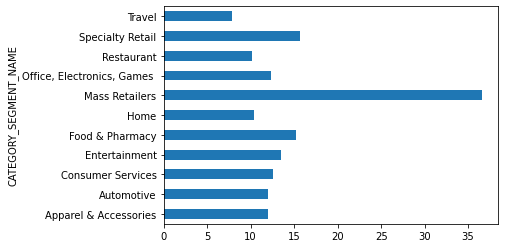

In [78]:
ax = final.plot.barh(xlabel='CATEGORY_SEGMENT_NAME', ylabel='mean', rot=0)

In [79]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math

In [ ]:
#data is heavily right skewed. 
#Couldn't be normalized using standardization, log transformation, log-log transformation, square-root of log transformation.
#Couldn't use BoxCox Transformation as values need to be strictly poistive.

In [97]:
nomissing_data['scaled_scores']= StandardScaler().fit_transform(nomissing_data[['Scores']])
nomissing_data.head()

C:\Users\AMRITA~1\AppData\Local\Temp/ipykernel_18280/2930051686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomissing_data['scaled_scores']= StandardScaler().fit_transform(nomissing_data[['Scores']])


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME,log_scores,log_sqrt_Scores,log_log_scores,scaled_scores
7,SEG_100001,4.0,Apparel & Accessories,Accessories,Coach,0.698970,0.836044,0.230186,-0.231770
14,SEG_100001,1.0,Apparel & Accessories,Accessories,Coach,0.301030,0.548662,0.114287,-0.310665
15,SEG_100001,2.2,Apparel & Accessories,Accessories,Coach,0.505150,0.710739,0.177580,-0.279107
16,SEG_100001,0.9,Apparel & Accessories,Accessories,Coach,0.278754,0.527971,0.106787,-0.313295
19,SEG_100001,4.6,Apparel & Accessories,Accessories,Coach,0.748188,0.864979,0.242588,-0.215991


In [98]:
nomissing_data['scaled_scores'].skew()

9.514319277387074

In [80]:
nomissing_data['log_scores'] = np.log10(nomissing_data['Scores']+1)
nomissing_data.head()

C:\Users\AMRITA~1\AppData\Local\Temp/ipykernel_18280/3404582561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomissing_data['log_scores'] = np.log10(nomissing_data['Scores']+1)


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME,log_scores
7,SEG_100001,4.0,Apparel & Accessories,Accessories,Coach,0.698970
14,SEG_100001,1.0,Apparel & Accessories,Accessories,Coach,0.301030
15,SEG_100001,2.2,Apparel & Accessories,Accessories,Coach,0.505150
16,SEG_100001,0.9,Apparel & Accessories,Accessories,Coach,0.278754
19,SEG_100001,4.6,Apparel & Accessories,Accessories,Coach,0.748188


In [81]:
nomissing_data.describe()

,Scores,log_scores
count,1.416821e+07,1.416821e+07
mean,1.281305e+01,6.051271e-01
std,3.802498e+01,5.927658e-01
min,0.000000e+00,0.000000e+00
25%,3.000000e-01,1.139434e-01
50%,1.600000e+00,4.149733e-01
75%,8.200000e+00,9.637878e-01
max,1.000000e+03,3.000434e+00


In [82]:
nomissing_data['log_sqrt_Scores'] = nomissing_data['log_scores']**0.5
nomissing_data.head()

C:\Users\AMRITA~1\AppData\Local\Temp/ipykernel_18280/1217963961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomissing_data['log_sqrt_Scores'] = nomissing_data['log_scores']**0.5


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME,log_scores,log_sqrt_Scores
7,SEG_100001,4.0,Apparel & Accessories,Accessories,Coach,0.698970,0.836044
14,SEG_100001,1.0,Apparel & Accessories,Accessories,Coach,0.301030,0.548662
15,SEG_100001,2.2,Apparel & Accessories,Accessories,Coach,0.505150,0.710739
16,SEG_100001,0.9,Apparel & Accessories,Accessories,Coach,0.278754,0.527971
19,SEG_100001,4.6,Apparel & Accessories,Accessories,Coach,0.748188,0.864979


<AxesSubplot:ylabel='Frequency'>

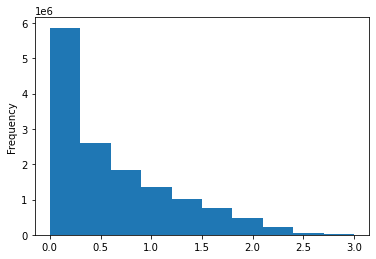

In [83]:
nomissing_data.log_scores.plot.hist()

In [84]:
nomissing_data['log_log_scores'] = np.log10(nomissing_data['log_scores']+1)
nomissing_data.head()

C:\Users\AMRITA~1\AppData\Local\Temp/ipykernel_18280/4040835898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nomissing_data['log_log_scores'] = np.log10(nomissing_data['log_scores']+1)


,SEGMENT_ID,Scores,CATEGORY_SEGMENT_NAME,SUB_CATEGORY_SEGMENT_NAME,BRAND_SEGMENT_NAME,log_scores,log_sqrt_Scores,log_log_scores
7,SEG_100001,4.0,Apparel & Accessories,Accessories,Coach,0.698970,0.836044,0.230186
14,SEG_100001,1.0,Apparel & Accessories,Accessories,Coach,0.301030,0.548662,0.114287
15,SEG_100001,2.2,Apparel & Accessories,Accessories,Coach,0.505150,0.710739,0.177580
16,SEG_100001,0.9,Apparel & Accessories,Accessories,Coach,0.278754,0.527971,0.106787
19,SEG_100001,4.6,Apparel & Accessories,Accessories,Coach,0.748188,0.864979,0.242588


<AxesSubplot:ylabel='Frequency'>

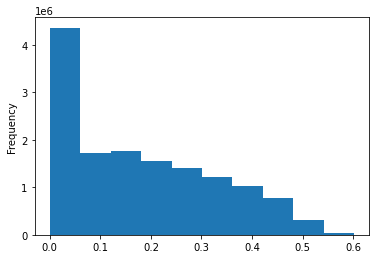

In [85]:
nomissing_data.log_log_scores.plot.hist()

In [86]:
nomissing_data['Scores'].skew()

9.514319277387079

In [87]:
nomissing_data['log_log_scores'].skew()

0.5167464884752203